# CMSC 197 (Machine Learning) - Assignment 2

### Earl James Q. Rentillo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

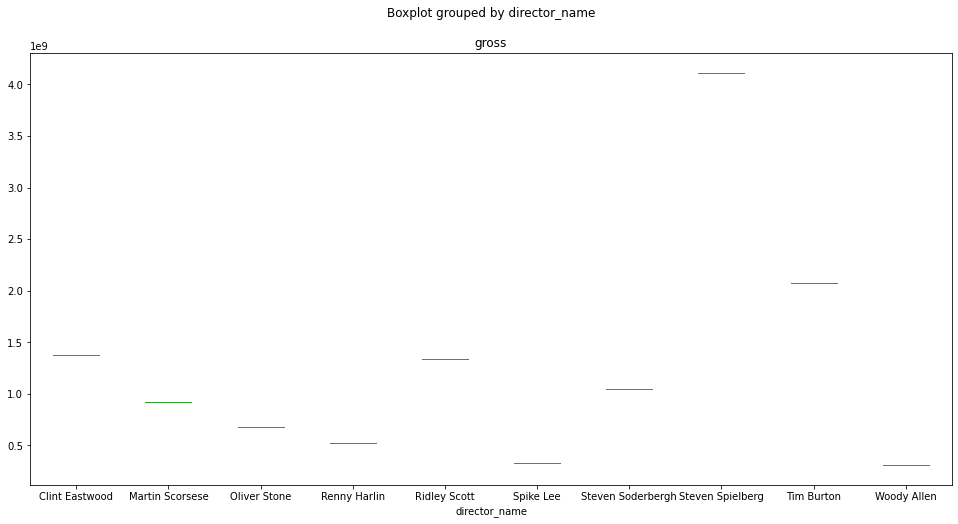

In [5]:
# top 10 directors with most movies directed
top10_most_directed = pd.value_counts(data['director_name'])[1:11]

# gross earnings of all directors
gross_by_director = data['gross'].groupby(data['director_name']).sum()

# top10_most_directed into dataframe
temp1 = top10_most_directed.rename_axis('director_name').reset_index(name='movie_directed')
# gross_by_director into dataframe
temp2 = gross_by_director.rename_axis('director_name').reset_index(name='gross')

# look up top10_most_directed in gross_by_director
res = (temp2.loc[temp2['director_name'].isin(temp1['director_name'])])

res = res.sort_values(by='gross', ascending=False)
res.boxplot(by ='director_name', column ='gross', grid = False, figsize=(16,8))
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

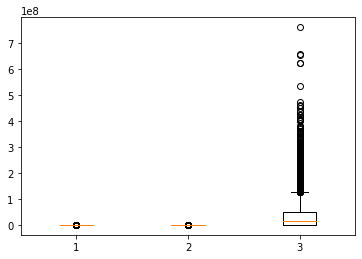

In [6]:
plt.boxplot([data['num_critic_for_reviews'], data['imdb_score'], data['gross']])
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [7]:
sales = data['gross'] - data['budget']
data['sales'] = sales
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [8]:
most_sales = data['sales'].groupby(data['director_name']).sum()
most_sales.sort_values(ascending = False)

director_name
Steven Spielberg    2.451332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Joss Whedon         1.000887e+09
Chris Columbus      9.417076e+08
                        ...     
Hayao Miyazaki     -2.444860e+09
Lajos Koltai       -2.499804e+09
Katsuhiro Ôtomo    -3.226670e+09
Chan-wook Park     -4.210905e+09
Joon-ho Bong       -1.224794e+10
Name: sales, Length: 2400, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

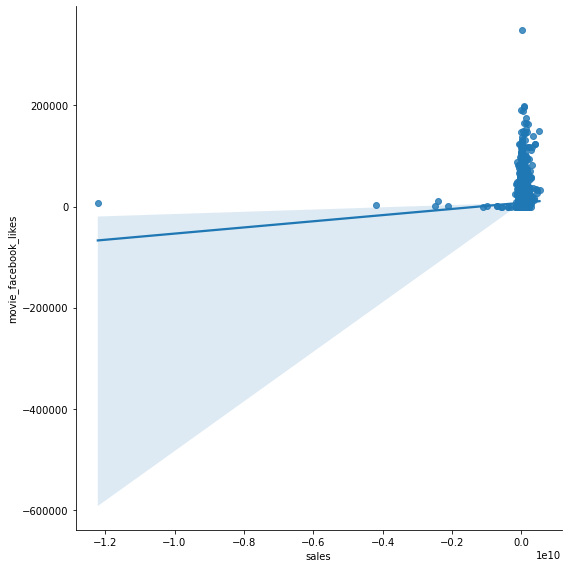

In [9]:
sns.lmplot(x="sales", 
           y="movie_facebook_likes",
           data=data, height=8)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

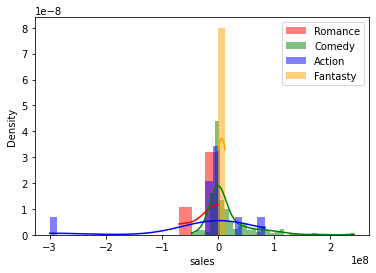

In [10]:
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="green", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="orange", label="Fantasty", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [11]:
average_actor_likes = data[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data['average_actor_likes'] = average_actor_likes
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667


## Copying the whole dataframe

In [12]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [13]:
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['scaled_num_critic_for_reviews'] = (df['num_critic_for_reviews'] - min) / (max-min)

In [14]:
max = df['duration'].max()
min = df['duration'].min()
df['scaled_duration'] = (df['duration'] - min) / (max-min)

In [15]:
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['scaled_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)

In [16]:
max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['scaled_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)

In [17]:
max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['scaled_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)

In [18]:
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['scaled_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)

In [19]:
max = df['gross'].max()
min = df['gross'].min()
df['scaled_gross'] = (df['gross'] - min) / (max-min)

In [20]:
max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['scaled_num_voted_users'] = (df['num_voted_users'] - min) / (max-min)

In [21]:
max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['scaled_cast_total_facebook_likes'] = (df['cast_total_facebook_likes'] - min) / (max-min)

In [22]:
max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['scaled_facenumber_in_poster'] = (df['facenumber_in_poster'] - min) / (max-min)

In [23]:
max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['scaled_num_user_for_reviews'] = (df['num_user_for_reviews'] - min) / (max-min)

In [24]:
max = df['budget'].max()
min = df['budget'].min()
df['scaled_budget'] = (df['budget'] - min) / (max-min)

In [25]:
max = df['title_year'].max()
min = df['title_year'].min()
df['scaled_title_year'] = (df['title_year'] - min) / (max-min)

In [26]:
max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['scaled_imdb_score'] = (df['imdb_score'] - min) / (max-min)

In [27]:
max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['scaled_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)

In [28]:
max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['scaled_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)

In [29]:
max = df['sales'].max()
min = df['sales'].min()
df['scaled_sales'] = (df['sales'] - min) / (max-min)

In [30]:
max = df['average_actor_likes'].max()
min = df['average_actor_likes'].min()
df['scaled_average_actor_likes'] = (df['average_actor_likes'] - min) / (max-min)